# Librerías de Uso - Sección 1

In [10]:
# Caso de Uso: Manipulación de Datos
import pandas as pd
import numpy as np
import datetime

# Caso de Uso: Graficación
import plotly.express as px
import matplotlib.pyplot as plt

# Caso de Uso: Construcción de Redes Jerárquicas
import networkx as nx

## Sección 1: Creación de un Diagrama Jerárquico de Empresas S&P500

In [11]:
# Database 1: Relación de Sectores, Industrias y Compañías que conforman el índice S&P500
df_sp = pd.read_csv('sp500_companies.csv', sep = ',')
print(df_sp)

    Exchange Symbol              Shortname               Longname  \
0        NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
1        NMS   AAPL             Apple Inc.             Apple Inc.   
2        NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
3        NMS   GOOG          Alphabet Inc.          Alphabet Inc.   
4        NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
..       ...    ...                    ...                    ...   
498      NYQ    FMC        FMC Corporation        FMC Corporation   
499      NYQ    RHI       Robert Half Inc.       Robert Half Inc.   
500      NYQ     GL        Globe Life Inc.        Globe Life Inc.   
501      NYQ    CMA  Comerica Incorporated  Comerica Incorporated   
502      NYQ    IVZ            Invesco Ltd           Invesco Ltd.   

                     Sector                        Industry  Currentprice  \
0                Technology       Software - Infrastructure        406.32   
1                

In [12]:
df_em = df_sp[['Shortname','Industry','Sector']]
df_em = df_em.drop_duplicates(subset = ['Shortname','Industry','Sector'])
df_em = df_em.reset_index(drop = True)
print(df_em)

                 Shortname                        Industry  \
0    Microsoft Corporation       Software - Infrastructure   
1               Apple Inc.            Consumer Electronics   
2       NVIDIA Corporation                  Semiconductors   
3            Alphabet Inc.  Internet Content & Information   
4         Amazon.com, Inc.                 Internet Retail   
..                     ...                             ...   
495        FMC Corporation             Agricultural Inputs   
496       Robert Half Inc.  Staffing & Employment Services   
497        Globe Life Inc.                Insurance - Life   
498  Comerica Incorporated                Banks - Regional   
499            Invesco Ltd                Asset Management   

                     Sector  
0                Technology  
1                Technology  
2                Technology  
3    Communication Services  
4         Consumer Cyclical  
..                      ...  
495         Basic Materials  
496            

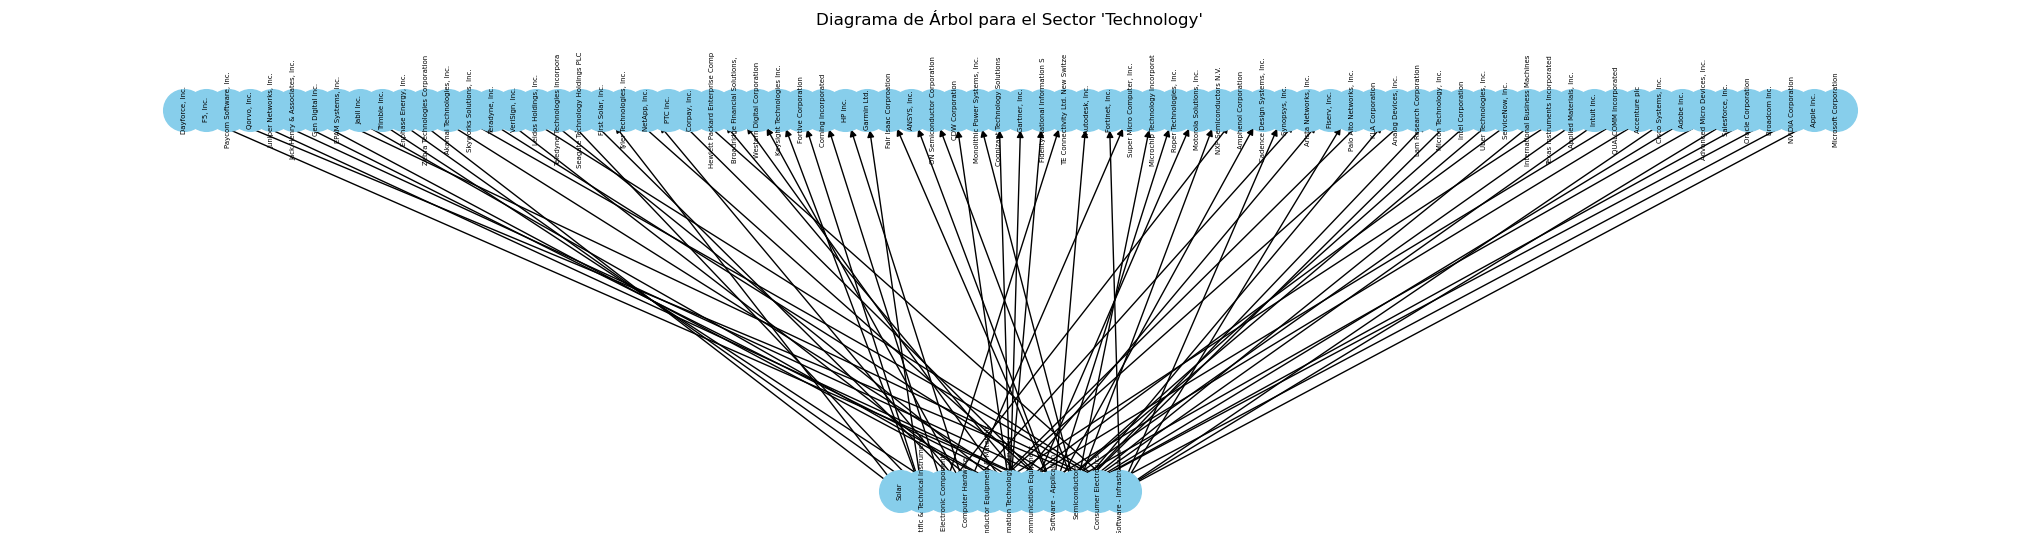

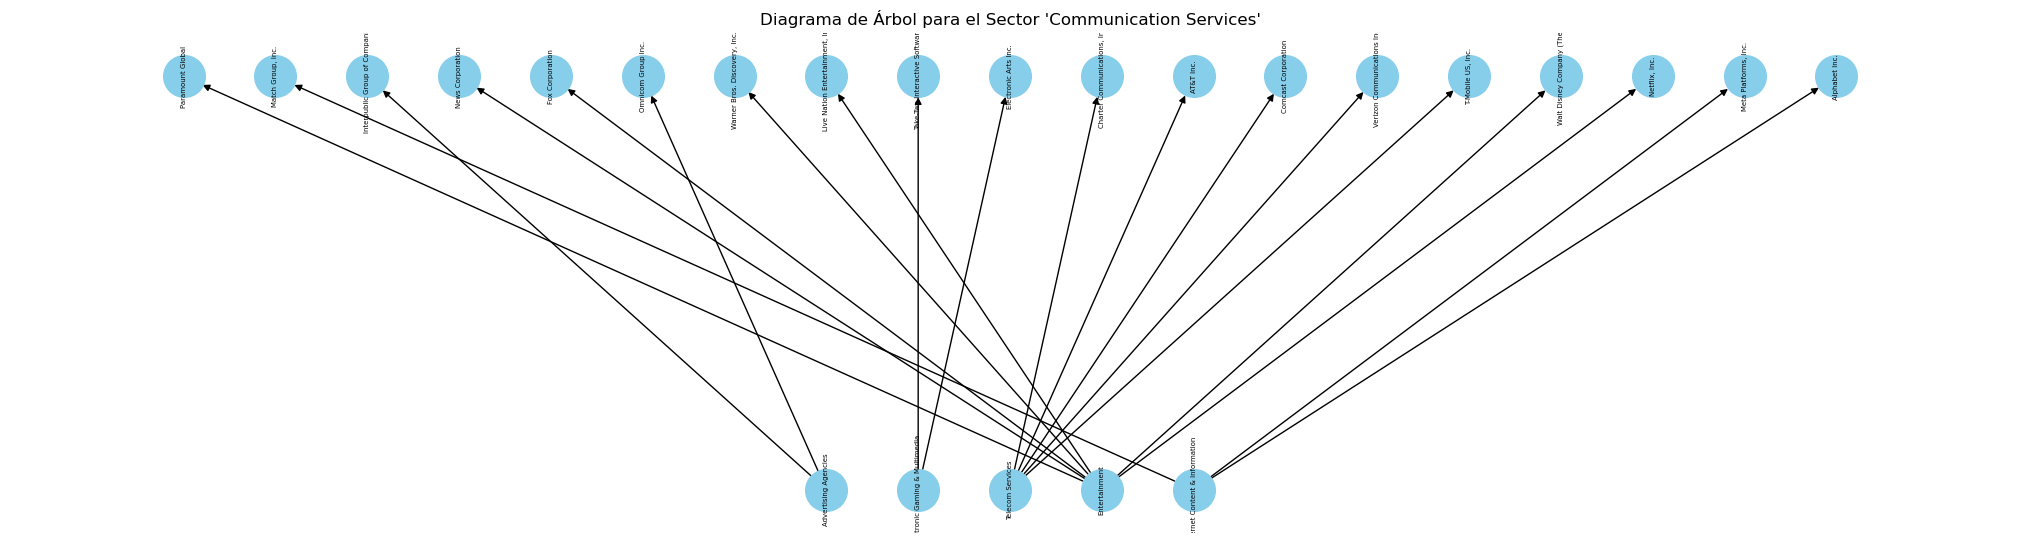

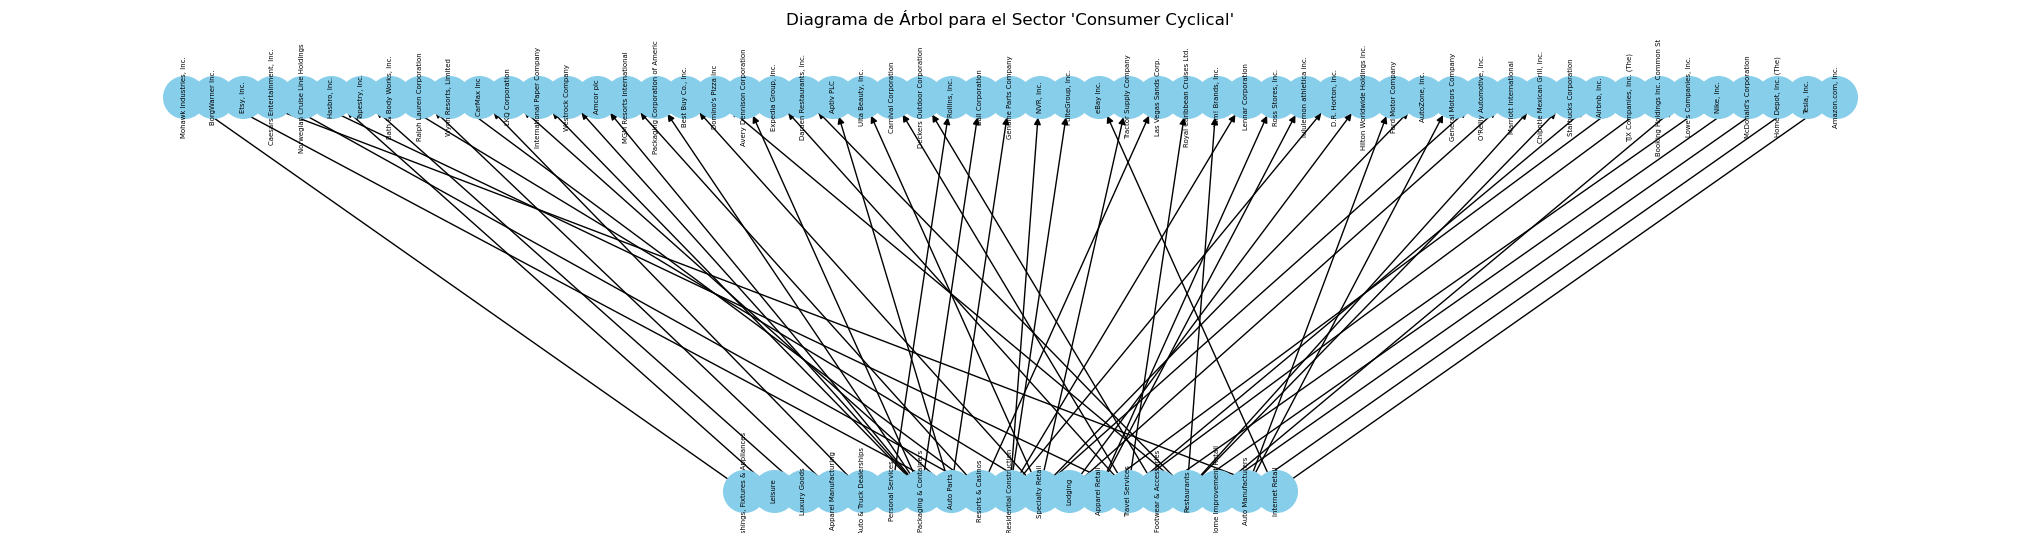

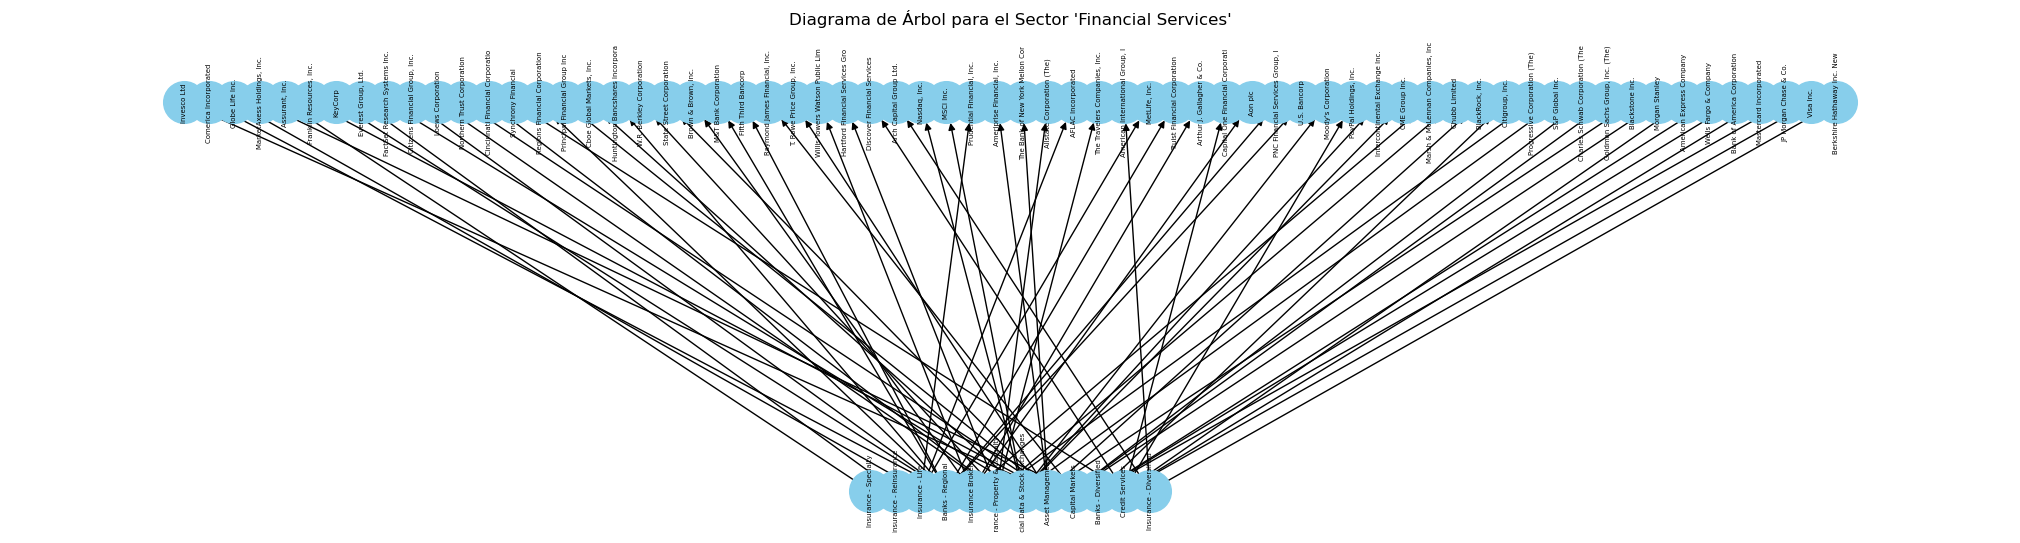

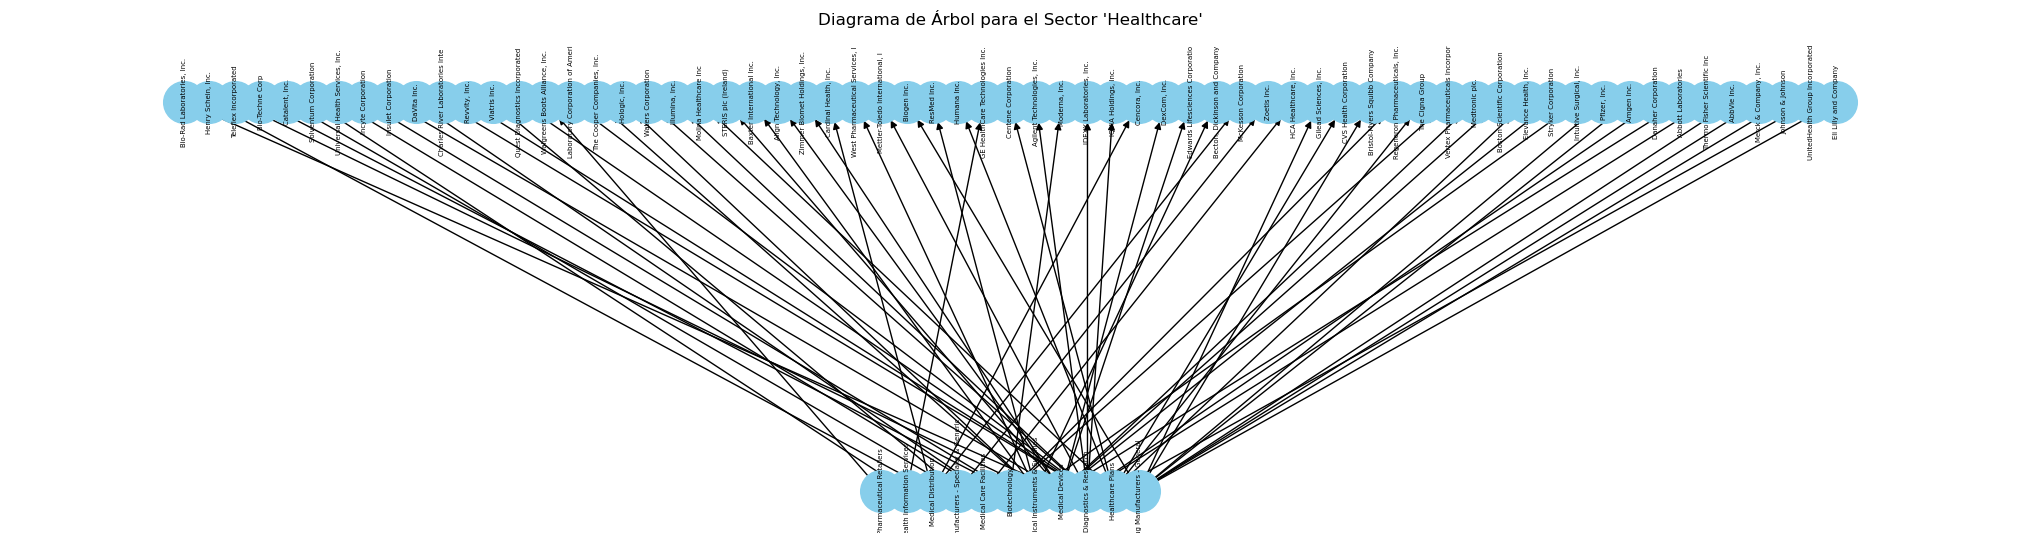

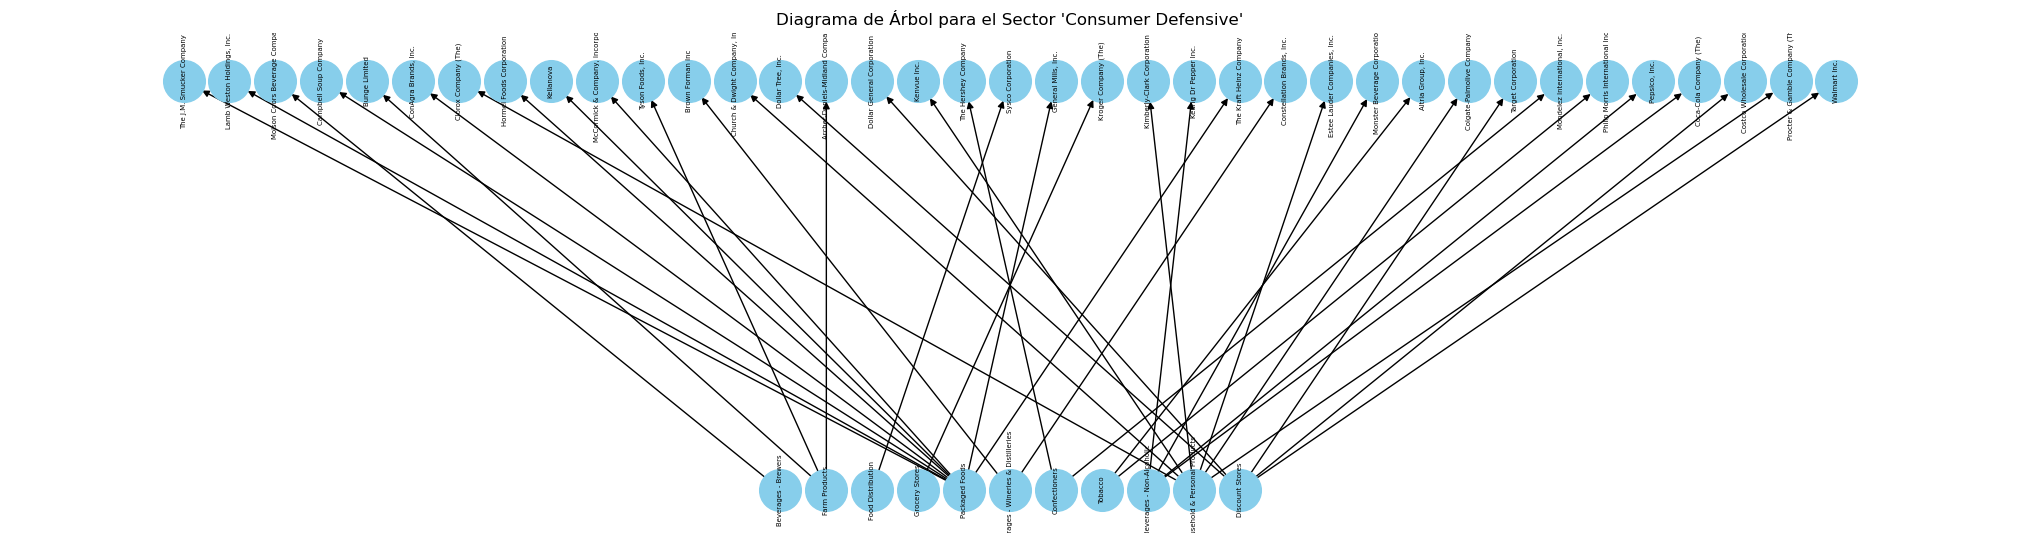

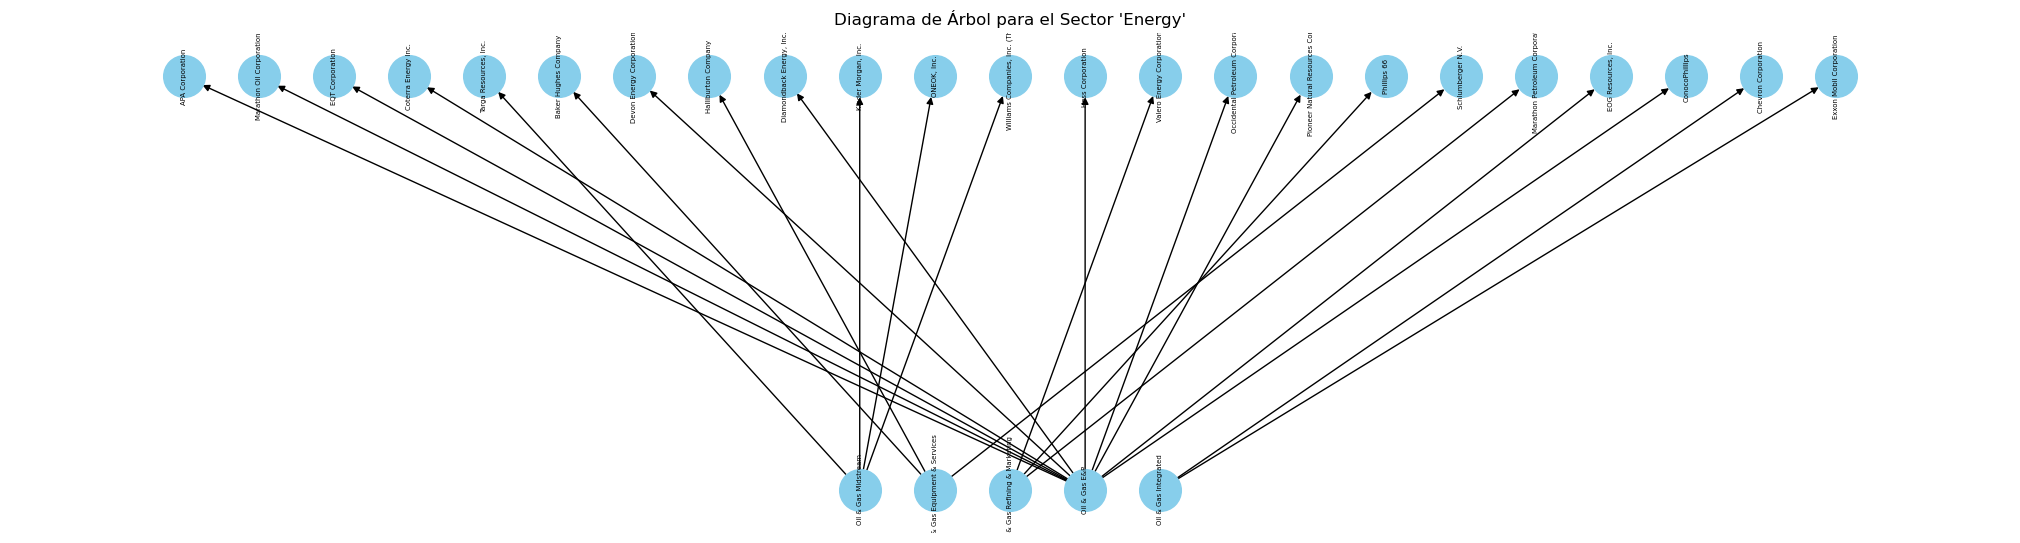

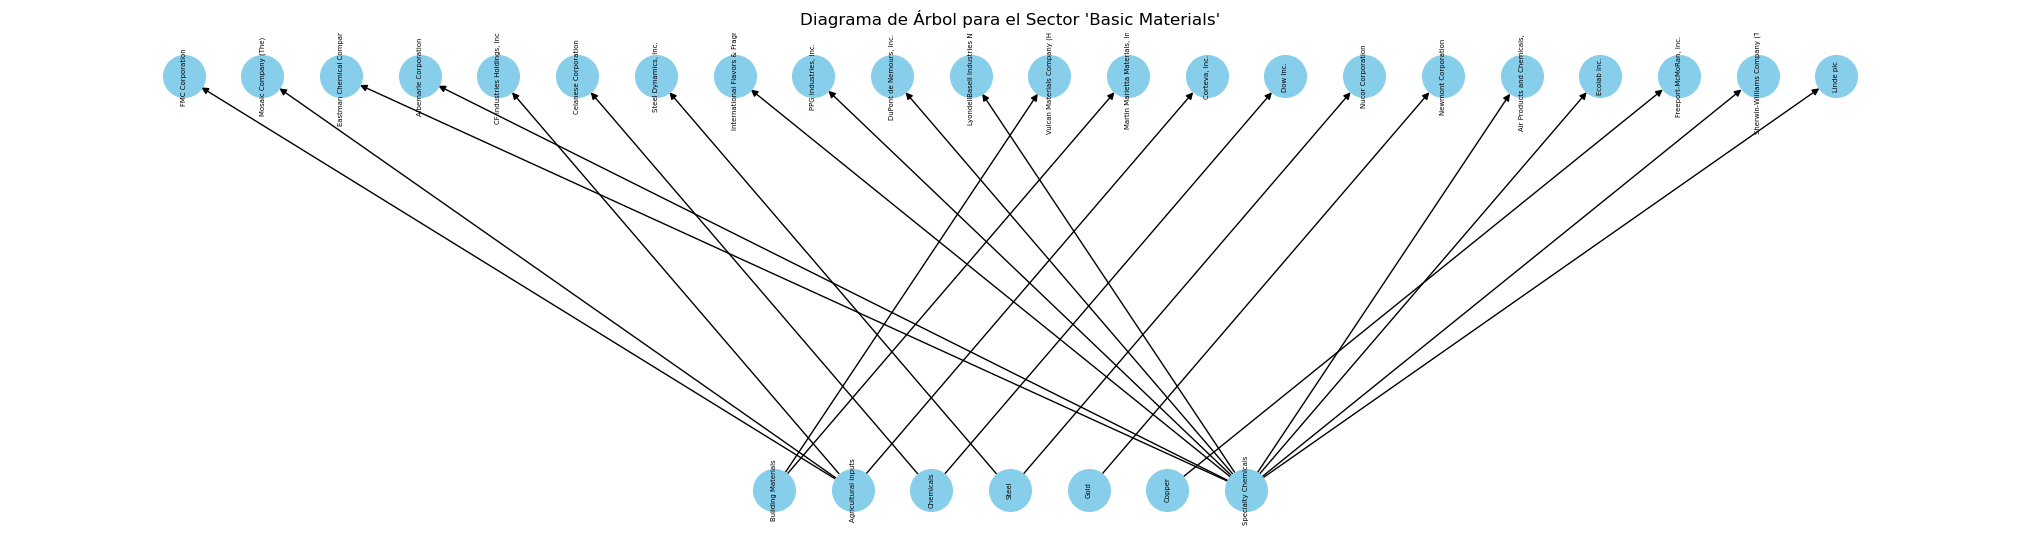

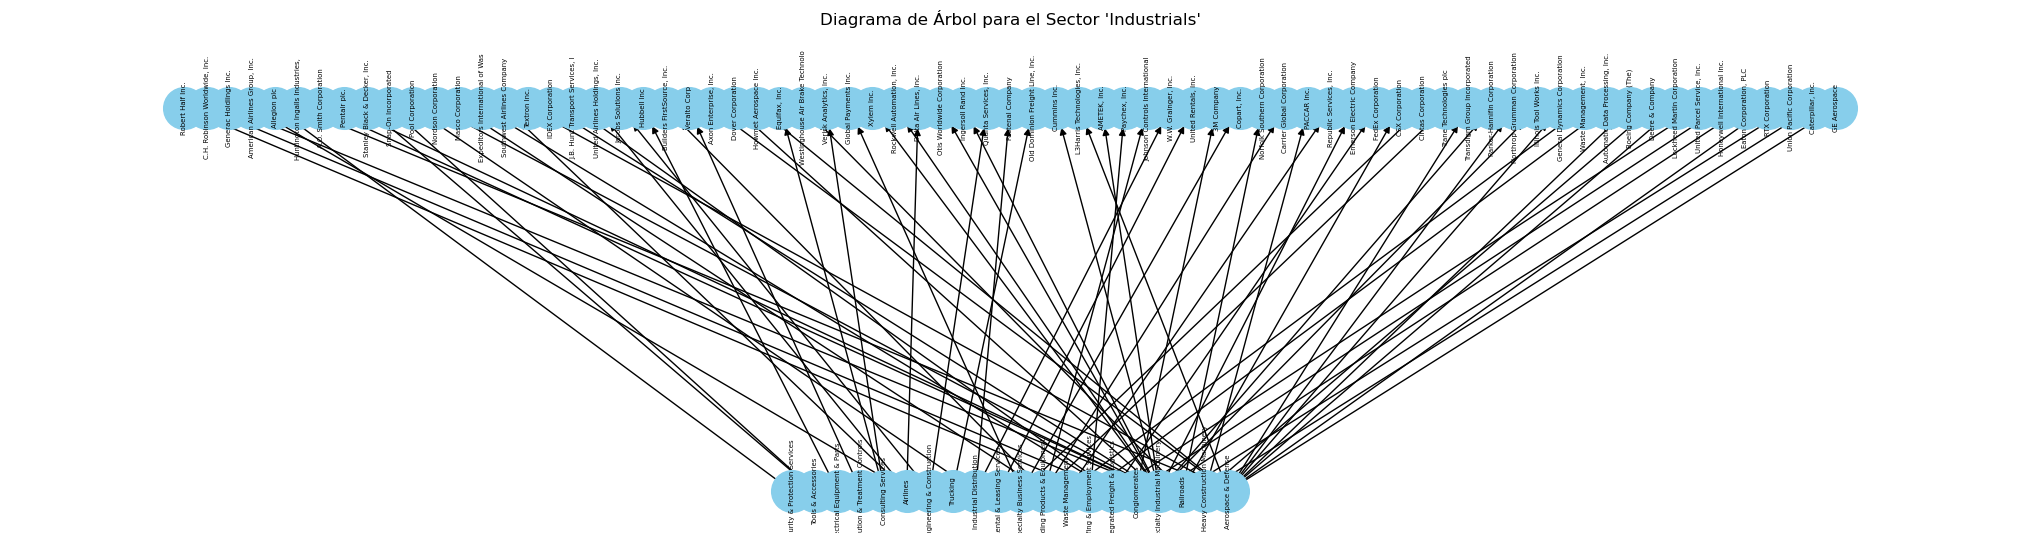

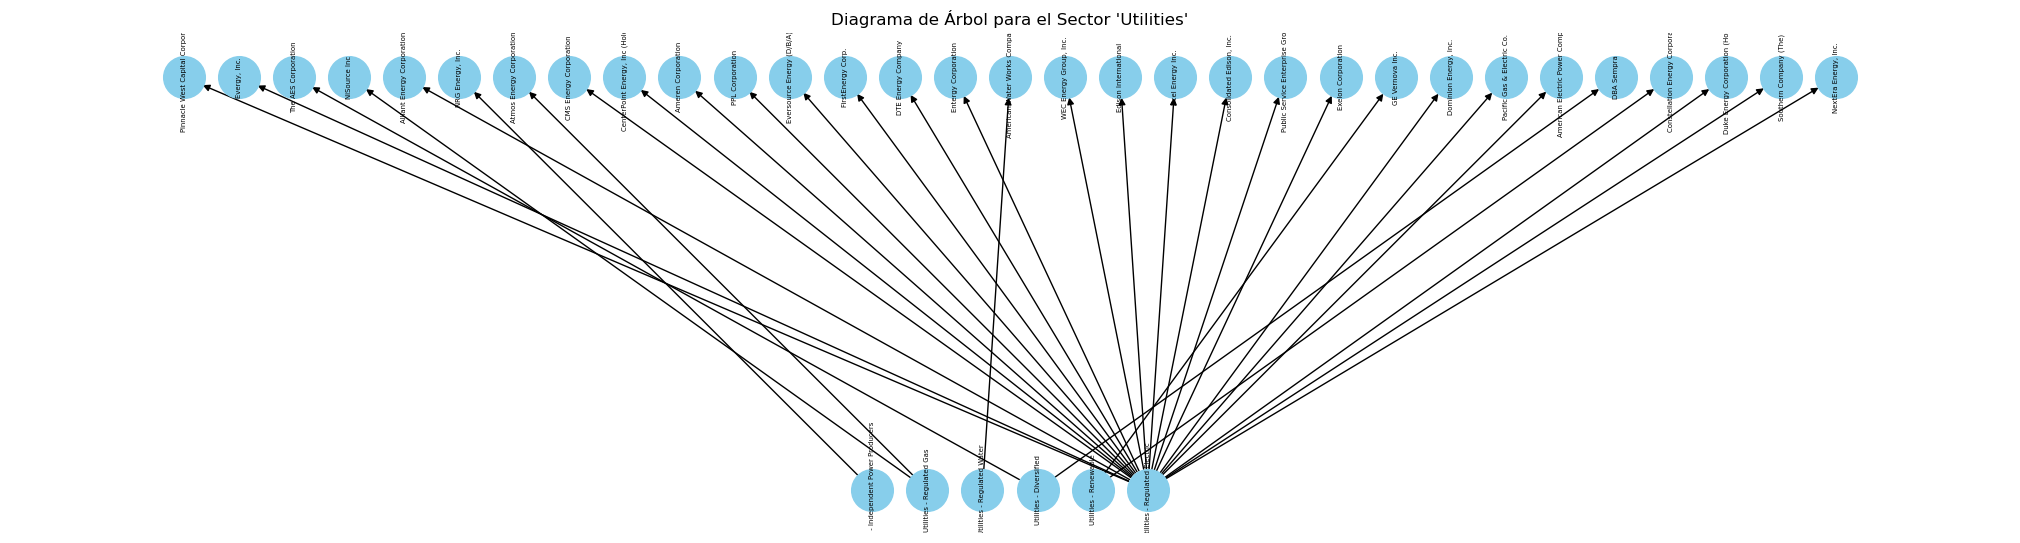

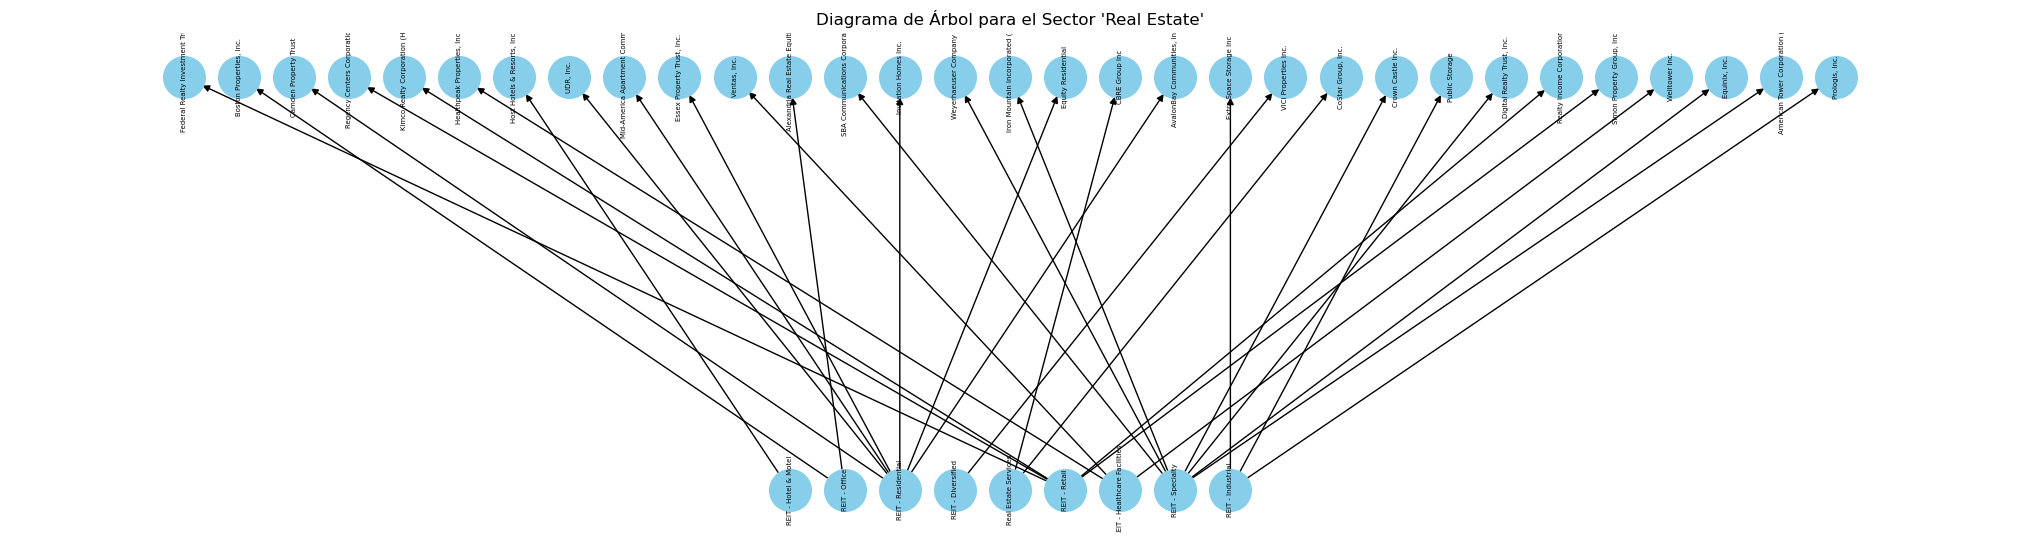

In [13]:
# Obtener los elementos únicos en la columna 'Sector'
sectores_unicos = df_em['Sector'].unique()

# Crear un diagrama de árbol para cada sector único
for sector in sectores_unicos:
    sub_df = df_em[df_em['Sector'] == sector]
    
    G = nx.DiGraph()
    
    for _, row in sub_df.iterrows():
        G.add_node(row['Industry'], subset=1)
        G.add_node(row['Shortname'], subset=2)
        G.add_edge(row['Industry'], row['Shortname'])
    
    pos = nx.multipartite_layout(G, subset_key="subset")

    # Invertir las coordenadas x e y para obtener una orientación horizontal
    pos = {node: (y, x) for node, (x, y) in pos.items()}
    
    plt.figure(figsize=(20, 5))
    nx.draw(G, pos, with_labels=False, node_size=900, node_color="skyblue", font_size=5, labels={node: node for node in G.nodes()}, font_color="black")

    text = nx.draw_networkx_labels(G, pos, font_size = 5)
    for _, t in text.items():
        t.set_rotation('vertical')
    
    plt.title(f"Diagrama de Árbol para el Sector '{sector}'")
    plt.show()

In [14]:
# Database 2: Relación deL precio del índice S&P 500
df_sp2 = pd.read_csv('sp500_index.csv', sep = ',')

fig = px.line(df_sp2, x="Date", y="S&P500", title='Price Evolution - S&P 500 Index')
fig.show()

# Librerías de Uso - Sección 2

In [15]:
# Caso de Uso: Creación de un Gráfico Dinámico
from sjvisualizer import plot as plt

## Sección 2: Generación de un Gráfico Dinamico - Animado

In [16]:
# Database 3: Detalle de las Acciones de cada empresa
df_sp3 = pd.read_csv('sp500_stocks.csv', sep = ',')
df_sp3 = pd.merge(df_sp3,df_sp, on = 'Symbol', how = 'inner')
print(df_sp3)

               Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   40.835033   69.414719   69.774246   69.122070   
1        2010-01-05    MMM   40.579258   68.979935   69.590302   68.311035   
2        2010-01-06    MMM   41.154758   69.958191   70.735786   69.824417   
3        2010-01-07    MMM   41.184273   70.008362   70.033447   68.662209   
4        2010-01-08    MMM   41.474472   70.501671   70.501671   69.648827   
...             ...    ...         ...         ...         ...         ...   
1812304  2024-04-22    ZTS  145.539993  145.539993  151.529999  144.800003   
1812305  2024-04-23    ZTS  149.559998  149.559998  149.899994  145.179993   
1812306  2024-04-24    ZTS  150.880005  150.880005  151.740005  148.750000   
1812307  2024-04-25    ZTS  153.360001  153.360001  153.589996  150.039993   
1812308  2024-04-26    ZTS  158.419998  158.419998  158.740005  152.630005   

               Open     Volume Exchange    Shortname  ... Curre

In [17]:
# Preparación de la Tabla Dinámica de Volumen Vendido por Empresa y Periodo
df_fil = df_sp3[['Date','Volume','Sector']]
df_fil['Date'] = pd.to_datetime(df_fil['Date'], format = '%Y-%m-%d')
df_fil['Year'] = df_fil['Date'].dt.year
df_fil = df_fil[df_fil['Year'] >= 2024]
df_fil['Volume'] = df_fil['Volume']/1000000
df_fil = df_fil.reset_index(drop = True)
df_fil = df_fil[['Date','Sector','Volume']]

df_fil = pd.pivot_table(df_fil, values = 'Volume', index = 'Date', columns = 'Sector')
df_fil = df_fil.reset_index()

df_fil.to_excel('sp500_stocks.xlsx', index = False)

C:\Users\PE73684176\AppData\Local\Temp\ipykernel_15708\2338149815.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PE73684176\AppData\Local\Temp\ipykernel_15708\2338149815.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Creación del Gráfico Evolutivo y almacenado en video
plt.bar(excel = "sp500_stocks.xlsx", 
        title = "Volume Evolution by Sector",
        sub_title = 'In millions of stocks', 
        unit = "MM",
        record = True)